In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


In [4]:
# Transformations for the input data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the training and test sets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Class labels in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Lists for recording training progress
epoch_list = []
training_loss_list = []
accuracy_list = []

# Train the network
start_time = time.time()

Epoch 1, Loss: 1.701
Epoch 2, Loss: 1.308
Epoch 3, Loss: 1.174
Epoch 4, Loss: 1.088
Epoch 5, Loss: 1.020
Epoch 6, Loss: 0.966
Epoch 7, Loss: 0.922
Epoch 8, Loss: 0.881
Epoch 9, Loss: 0.854
Epoch 10, Loss: 0.821
Epoch 11, Loss: 0.794
Epoch 12, Loss: 0.777
Epoch 13, Loss: 0.757
Epoch 14, Loss: 0.737
Epoch 15, Loss: 0.722
Epoch 16, Loss: 0.706
Epoch 17, Loss: 0.696
Epoch 18, Loss: 0.682
Epoch 19, Loss: 0.669
Epoch 20, Loss: 0.663
Epoch 21, Loss: 0.661
Epoch 22, Loss: 0.646
Epoch 23, Loss: 0.639
Epoch 24, Loss: 0.634
Epoch 25, Loss: 0.634
Epoch 26, Loss: 0.623
Epoch 27, Loss: 0.620
Epoch 28, Loss: 0.614
Epoch 29, Loss: 0.610
Epoch 30, Loss: 0.605
Epoch 31, Loss: 0.615
Epoch 32, Loss: 0.608
Epoch 33, Loss: 0.612
Epoch 34, Loss: 0.604
Epoch 35, Loss: 0.615
Epoch 36, Loss: 0.597
Epoch 37, Loss: 0.601
Epoch 38, Loss: 0.596
Epoch 39, Loss: 0.597
Epoch 40, Loss: 0.598
Epoch 41, Loss: 0.602
Epoch 42, Loss: 0.602
Epoch 43, Loss: 0.594
Epoch 44, Loss: 0.598
Epoch 45, Loss: 0.595
Epoch 46, Loss: 0.5

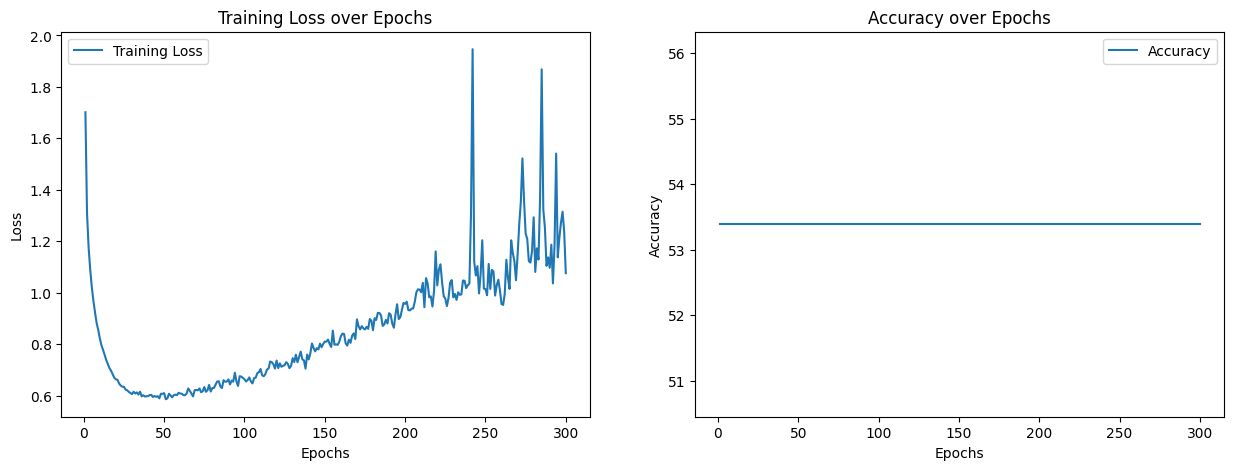

In [8]:
for epoch in range(300):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Record the training loss per epoch
    epoch_loss = running_loss / len(trainloader)
    epoch_list.append(epoch + 1)
    training_loss_list.append(epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.3f}')

end_time = time.time()
training_time = end_time - start_time
print('Finished Training')
print(f'Training Time: {training_time:.2f} seconds')

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # Move data to device
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
accuracy_list = [accuracy] * 300  # Repeat the final accuracy for plotting
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

# Plotting the graphs
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epoch_list, training_loss_list, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epoch_list, accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

Using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.939
Epoch 2, Loss: 1.559
Epoch 3, Loss: 1.439
Epoch 4, Loss: 1.366
Epoch 5, Loss: 1.313
Epoch 6, Loss: 1.273
Epoch 7, Loss: 1.245
Epoch 8, Loss: 1.222
Epoch 9, Loss: 1.199
Epoch 10, Loss: 1.183
Epoch 11, Loss: 1.168
Epoch 12, Loss: 1.159
Epoch 13, Loss: 1.146
Epoch 14, Loss: 1.135
Epoch 15, Loss: 1.131
Epoch 16, Loss: 1.120
Epoch 17, Loss: 1.112
Epoch 18, Loss: 1.107
Epoch 19, Loss: 1.105
Epoch 20, Loss: 1.097
Epoch 21, Loss: 1.088
Epoch 22, Loss: 1.088
Epoch 23, Loss: 1.087
Epoch 24, Loss: 1.084
Epoch 25, Loss: 1.076
Epoch 26, Loss: 1.075
Epoch 27, Loss: 1.073
Epoch 28, Loss: 1.074
Epoch 29, Loss: 1.069
Epoch 30, Loss: 1.071
Epoch 31, Loss: 1.068
Epoch 32, Loss: 1.063
Epoch 33, Loss: 1.067
Epoch 34, Loss: 1.064
Epoch 35, Loss: 1.062
Epoch 36, Loss: 1.060
Epoch 37, Loss: 1.058
Epoch 38, Loss: 1.059
Epoch 39, Loss: 1.057
Epoch 40, Loss: 1.057
Epoch 41, Loss: 1.057
Epoch 42, 

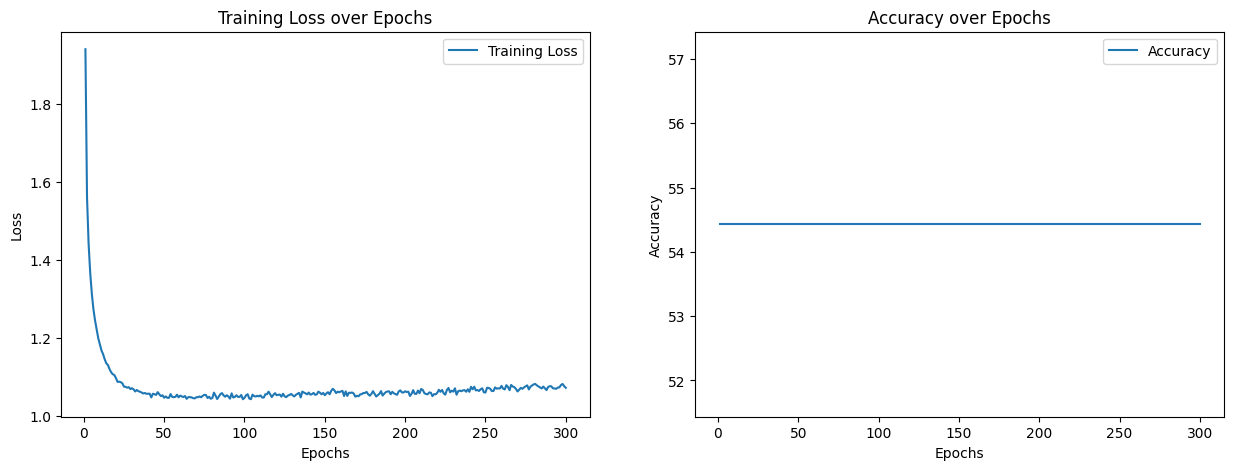

In [12]:
# Question 1 
# Part B 

# Check for GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transformations for the input data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Load the training and test sets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Extended CNN architecture
class ExtendedNet(nn.Module):
    def __init__(self):
        super(ExtendedNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 3)  # Additional convolution layer

        # Dummy input to get the size of the output of conv layers
        self._to_linear = None
        self.dummy_forward(torch.zeros(1, 3, 32, 32))

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output layer for 10 classes

    def dummy_forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        self._to_linear = x.shape[1] * x.shape[2] * x.shape[3]

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, self._to_linear)  # Reshape input to the linear layer
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = ExtendedNet()
net.to(device)  # Move the network onto the device (GPU or CPU)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Lists for recording training progress
epoch_list = []
training_loss_list = []
accuracy_list = []

# Train the network
start_time = time.time()

for epoch in range(300):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Record the training loss per epoch
    epoch_loss = running_loss / len(trainloader)
    epoch_list.append(epoch + 1)
    training_loss_list.append(epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.3f}')

end_time = time.time()
training_time = end_time - start_time
print('Finished Training')
print(f'Training Time: {training_time:.2f} seconds')

# Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # Move data to device
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
accuracy_list = [accuracy] * 300  # Repeat the final accuracy for plotting
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

# Plotting the graphs
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epoch_list, training_loss_list, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epoch_list, accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

In [14]:
# Question 2 
# Part A

# Check for GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ResNet Block
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.relu(out)
        return out

# ResNet-10
class ResNet10(nn.Module):
    def __init__(self, num_blocks, num_classes=10):
        super(ResNet10, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        # Layers: Each layer has 2 blocks for ResNet-10
        self.layer1 = self._make_layer(64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(512, num_blocks[3], stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(ResNetBlock(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Transformations for the input data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training and test sets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

net = ResNet10(num_blocks=[2, 2, 2, 2]).to(device)  # 10 blocks in total

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Lists for recording training progress
epoch_list = []
training_loss_list = []
accuracy_list = []

# Train the network
start_time = time.time()

for epoch in range(300):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to device

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    epoch_list.append(epoch + 1)
    training_loss_list.append(epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.3f}')

end_time = time.time()
training_time = end_time - start_time
print('Finished Training')
print(f'Training Time: {training_time:.2f} seconds')

# Testing the network
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
accuracy_list = [accuracy] * 300
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')

# Plotting the graphs
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epoch_list, training_loss_list, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epoch_list, accuracy_list, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

Using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.397
Epoch 2, Loss: 0.831
Epoch 3, Loss: 0.615
Epoch 4, Loss: 0.471
Epoch 5, Loss: 0.359
Epoch 6, Loss: 0.266
Epoch 7, Loss: 0.189
Epoch 8, Loss: 0.132
Epoch 9, Loss: 0.096
Epoch 10, Loss: 0.066
Epoch 11, Loss: 0.049
Epoch 12, Loss: 0.034
Epoch 13, Loss: 0.027
Epoch 14, Loss: 0.018
Epoch 15, Loss: 0.012
Epoch 16, Loss: 0.012
Epoch 17, Loss: 0.009
Epoch 18, Loss: 0.008
Epoch 19, Loss: 0.007
Epoch 20, Loss: 0.005
Epoch 21, Loss: 0.004
Epoch 22, Loss: 0.003
Epoch 23, Loss: 0.002
Epoch 24, Loss: 0.001
Epoch 25, Loss: 0.001
Epoch 26, Loss: 0.001
Epoch 27, Loss: 0.001
Epoch 28, Loss: 0.001
Epoch 29, Loss: 0.001
Epoch 30, Loss: 0.001
Epoch 31, Loss: 0.001
Epoch 32, Loss: 0.001
Epoch 33, Loss: 0.001
Epoch 34, Loss: 0.000
Epoch 35, Loss: 0.001
Epoch 36, Loss: 0.000
Epoch 37, Loss: 0.000
Epoch 38, Loss: 0.000
Epoch 39, Loss: 0.000
Epoch 40, Loss: 0.000
Epoch 41, Loss: 0.000
Epoch 42, 

KeyboardInterrupt: 